In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = make_blobs(n_samples=1000,centers=10,random_state=42)
X,y

(array([[-1.61989569, -2.57677003],
        [-3.70050112,  9.67083974],
        [-5.33943813, -5.73938285],
        ...,
        [-9.76138194,  9.41377609],
        [-6.30307023, -6.56885944],
        [-5.6411193 , -6.70474296]]),
 array([9, 0, 7, 1, 9, 7, 8, 6, 3, 7, 4, 8, 4, 2, 2, 7, 8, 1, 7, 9, 1, 4,
        7, 5, 8, 5, 7, 2, 5, 6, 7, 1, 6, 8, 3, 6, 1, 2, 8, 9, 1, 9, 5, 2,
        9, 5, 6, 5, 0, 1, 2, 7, 0, 3, 3, 0, 5, 6, 9, 5, 7, 4, 6, 8, 4, 5,
        9, 2, 5, 4, 8, 8, 0, 2, 7, 1, 3, 3, 3, 6, 3, 4, 7, 4, 0, 3, 6, 4,
        4, 0, 0, 4, 9, 2, 1, 1, 4, 9, 3, 1, 1, 3, 6, 1, 4, 0, 3, 4, 7, 4,
        6, 1, 3, 4, 9, 0, 2, 2, 6, 9, 8, 2, 2, 2, 0, 8, 1, 6, 4, 0, 9, 4,
        3, 6, 0, 1, 1, 3, 4, 4, 6, 8, 6, 7, 7, 7, 4, 9, 8, 2, 1, 5, 4, 4,
        3, 2, 0, 6, 6, 5, 4, 2, 6, 5, 6, 7, 2, 0, 8, 2, 0, 9, 8, 2, 5, 7,
        1, 2, 2, 7, 6, 5, 1, 2, 5, 1, 1, 0, 8, 7, 8, 5, 6, 5, 7, 2, 7, 0,
        9, 4, 9, 6, 3, 7, 8, 2, 0, 2, 8, 0, 2, 4, 3, 1, 4, 3, 1, 7, 3, 8,
        7, 3, 5, 2, 6, 9, 1, 

In [3]:
s = StandardScaler()
X = s.fit_transform(X)
X

array([[ 0.1783816 , -0.57137505],
       [-0.205959  ,  1.39726472],
       [-0.50871223, -1.07972284],
       ...,
       [-1.3255574 ,  1.35594517],
       [-0.68671951, -1.21305013],
       [-0.56444039, -1.23489159]])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_train = torch.tensor(X_train,dtype=torch.float)
X_test = torch.tensor(X_test,dtype=torch.float)
y_train = torch.tensor(y_train,dtype=torch.long)
y_test = torch.tensor(y_test,dtype=torch.long)

In [6]:
input_dim = X_train.shape[1]
output_dim = 10

In [7]:
w1 = torch.randn(input_dim,output_dim,dtype=torch.float32,requires_grad=True)
b1 = torch.zeros(output_dim,dtype=torch.float32,requires_grad=True)

w1,b1

(tensor([[-0.7790,  0.3320, -0.3957, -1.7680,  0.7295, -1.8535,  0.0346, -0.0582,
          -0.2022,  1.1592],
         [-1.3149, -1.8364,  0.6515, -1.1951,  0.2194,  0.6479,  0.4335, -0.7468,
           0.0419, -0.5998]], requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

In [8]:
def relu(x):
  return torch.maximum(x,torch.zeros_like(x))

def softmax(x):
  ex = torch.exp(x-torch.max(x,dim=1,keepdim=True)[0])
  return ex/ex.sum(dim=1,keepdim=True)



In [9]:
def forward(x):
  z1 = torch.matmul(x,w1)+b1
  a1 = softmax(z1)
  return a1

def predict(x):
  with torch.no_grad():
    y_pred = forward(x)
    _,prediction=torch.max(y_pred,dim=1)
  return prediction

In [10]:
def CE_loss(y_pred,y_true):
  y_one_hot = torch.zeros_like(y_pred)
  y_one_hot[torch.arange(y_pred.shape[0]),y_true] = 1
  return -torch.mean(torch.sum(y_one_hot*torch.log(y_pred),dim=1))

In [11]:
lr = 0.001
epochs = 100
for epoch in range(epochs):
  y_pred = forward(X_train)
  loss = CE_loss(y_pred,y_train)
  loss.backward()

  with torch.no_grad():
    w1 -= lr*w1.grad
    b1 -= lr*b1.grad
    w1.grad.zero_()
    b1.grad.zero_()

  print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item()}")

Epoch 1/100 Loss: 2.659198522567749
Epoch 2/100 Loss: 2.6589531898498535
Epoch 3/100 Loss: 2.6587085723876953
Epoch 4/100 Loss: 2.658463716506958
Epoch 5/100 Loss: 2.6582190990448
Epoch 6/100 Loss: 2.6579740047454834
Epoch 7/100 Loss: 2.657728910446167
Epoch 8/100 Loss: 2.657484531402588
Epoch 9/100 Loss: 2.6572396755218506
Epoch 10/100 Loss: 2.656994581222534
Epoch 11/100 Loss: 2.656750202178955
Epoch 12/100 Loss: 2.6565053462982178
Epoch 13/100 Loss: 2.6562609672546387
Epoch 14/100 Loss: 2.6560165882110596
Epoch 15/100 Loss: 2.6557722091674805
Epoch 16/100 Loss: 2.655527353286743
Epoch 17/100 Loss: 2.655283212661743
Epoch 18/100 Loss: 2.655038356781006
Epoch 19/100 Loss: 2.654794216156006
Epoch 20/100 Loss: 2.6545495986938477
Epoch 21/100 Loss: 2.6543054580688477
Epoch 22/100 Loss: 2.6540610790252686
Epoch 23/100 Loss: 2.6538164615631104
Epoch 24/100 Loss: 2.6535723209381104
Epoch 25/100 Loss: 2.6533281803131104
Epoch 26/100 Loss: 2.6530838012695312
Epoch 27/100 Loss: 2.6528398990631

In [12]:
y_pred = predict(X_test)
accuracy = (y_pred==y_test).sum().item()/y_test.size(0)
print(f"Accuracy: {accuracy}")

Accuracy: 0.23


In [13]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


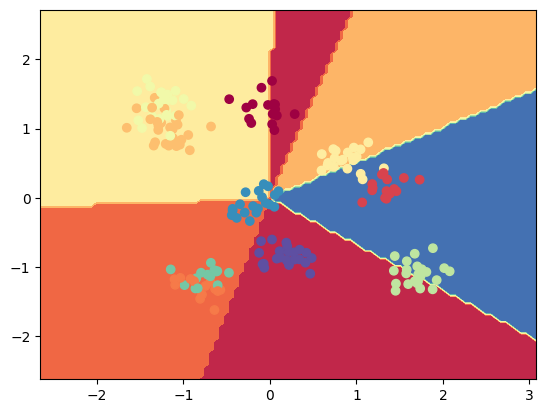

In [14]:
def plot_decision_boundaries(X,y,model):
  x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = torch.meshgrid(torch.linspace(x_min,x_max,100),torch.linspace(y_min,y_max,100))
  grid = torch.stack([xx.ravel(),yy.ravel()],dim=1)
  y_pred = predict(grid)
  pred = y_pred.view(xx.shape)
  plt.contourf(xx,yy,pred.numpy(),cmap=plt.cm.Spectral)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)
  plt.show()

plot_decision_boundaries(X_test,y_test,forward)

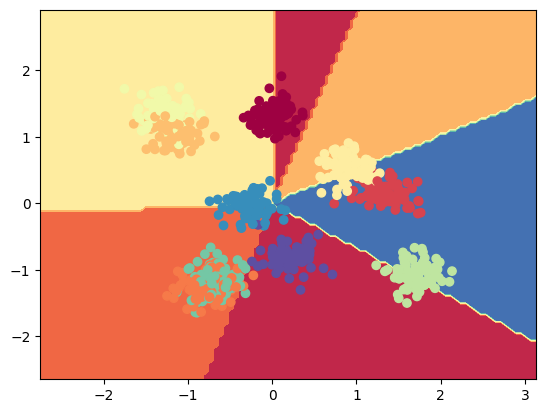

In [15]:
plot_decision_boundaries(X_train,y_train,forward)